In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [339]:
df = pd.read_csv("Mall_Customers.csv")

In [340]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

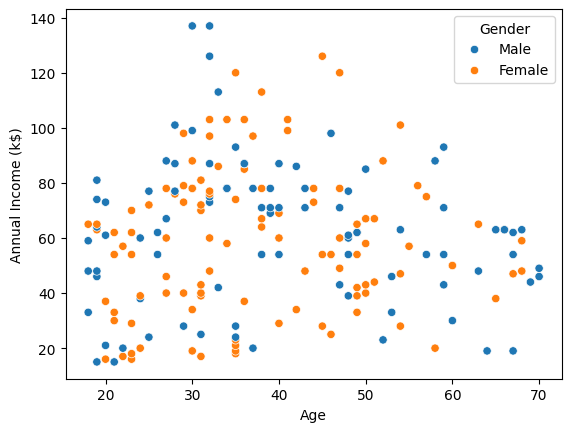

In [341]:
sns.scatterplot(x="Age", y = "Annual Income (k$)", data=df, hue="Gender")

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

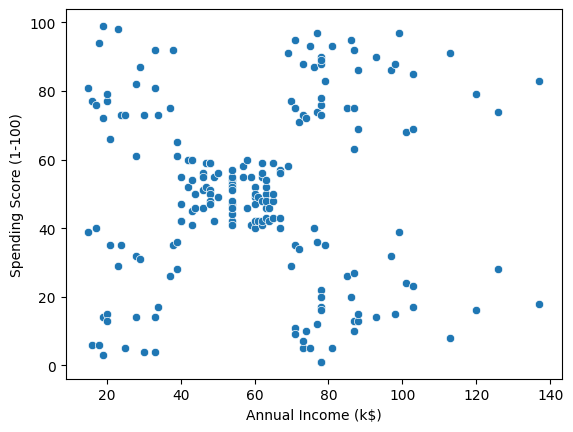

In [342]:
sns.scatterplot(y="Spending Score (1-100)", x = "Annual Income (k$)", data=df)

In [343]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X = MinMaxScaler().fit_transform(X)

In [344]:
n = np.arange(2,11,1)
inertia_list = []
sil_list = []

for cluster in n:
    kmeans_instance = KMeans(n_clusters=cluster).fit(X)
    inertia_list.append(kmeans_instance.inertia_)
    sil_list.append(silhouette_score(X, kmeans_instance.labels_))

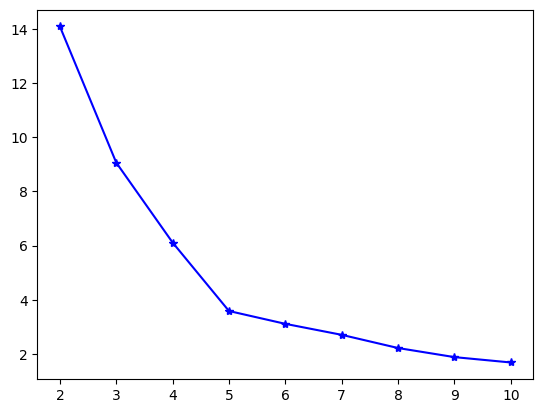

In [345]:
plt.plot(n, inertia_list, "b*-")

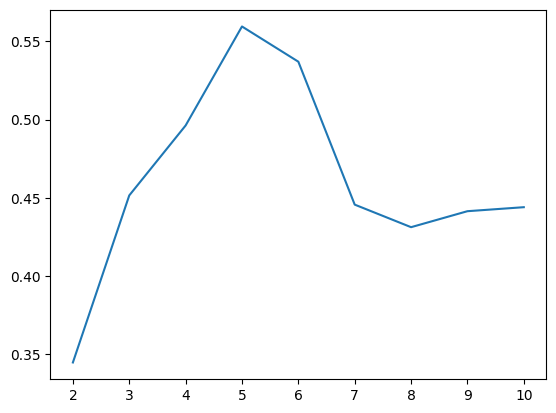

In [346]:
plt.plot(n, sil_list)

# optimal cluster number = 5

In [347]:
kmeans5 = KMeans(n_clusters=5).fit(X)

In [348]:
kmeans5.inertia_, silhouette_score(X, kmeans5.labels_)

(3.5834407128859733, 0.5602436353739457)

In [349]:
y_pred = kmeans5.predict(X)

In [350]:
y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [351]:
df["Cluster Number"] = y_pred

In [352]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


Text(0.5, 1.0, 'Mall customer data clustering')

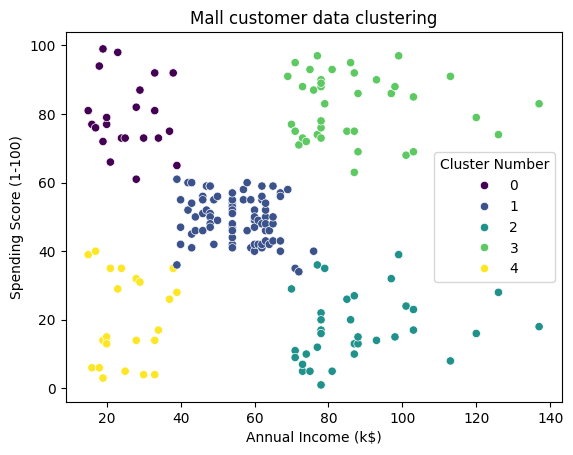

In [353]:
sns.scatterplot(x="Annual Income (k$)", y ="Spending Score (1-100)", data=df, hue="Cluster Number", palette="viridis")
plt.title("Mall customer data clustering")

In [354]:
unseen_data = np.array([[10, 20.1], [50, 20.1],[70, 40.1],[100, 120.1],[0, 70.1],[100, 140.1],[80, 30.1],[80, 40.1],[100, 115.1],[78, 49.1],[78, 50.1],[60, 100.1]])
unseen_data = MinMaxScaler().fit_transform(unseen_data)
kmeans5.predict(unseen_data)

array([4, 2, 2, 3, 4, 3, 2, 2, 3, 2, 2, 3])